#                                      MIS 665 MIDTERM PROJECT

## Section 1: Business Understanding

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as stats
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv('data/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


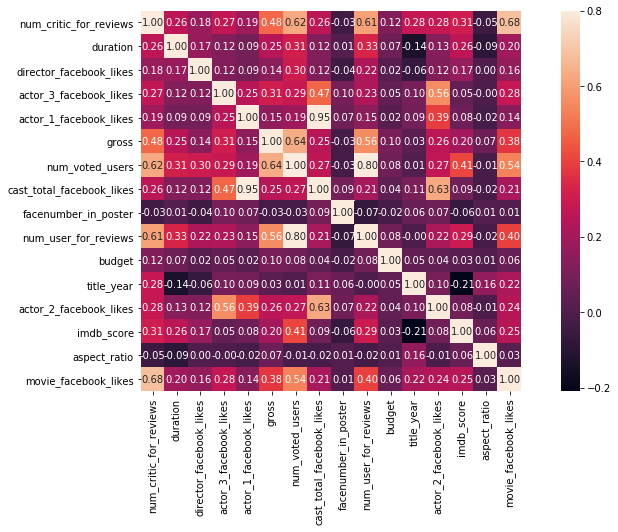

In [3]:
#Preliminary Correlation Analysis
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".2f")

This business problem can best be described as trying to understand the factors that lead a movie to be successful in terms of its IMDB score. There are three main components to this project. 

1. We want to take the data that we already do have, and use it to make predictions about new movies that come out so that we can hopefully and accurately predict the movie's score on IMDB.

2. The kind of data we will need to build a good model would be the Actors in the movie, the director, what the budget for the movie was, how much money it made at the box office, how long the movie is, and what genre the movie is.

3. The top 3 variables that are most highly correlated with IMDB score are "num_voted_users", "num_critic_for_reviews", and "num_users_for_reviews"

## Section 2: Data Understanding

In [4]:
#Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [5]:
#Data Quality Issues
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
#Describing the data

df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


#### Value Counts for Variables thought to be Important to IMDB Score

In [7]:
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

In [8]:
df['country'].value_counts().head(10)

USA          3807
UK            448
France        154
Canada        126
Germany        97
Australia      55
India          34
Spain          33
China          30
Italy          23
Name: country, dtype: int64

In [9]:
df['language'].value_counts().head(10)

English      4704
French         73
Spanish        40
Hindi          28
Mandarin       26
German         19
Japanese       18
Cantonese      11
Russian        11
Italian        11
Name: language, dtype: int64

## Section 3: Data Preprocessing

In [10]:
#Identifying Missing Values
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

### Section 3.1 Identifying what kinds of values exist in the non-numerica data like Rating, Country etc.

In [11]:
df.groupby('genres').size()

genres
Action                                                             11
Action|Adventure                                                   11
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy              1
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller     1
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi               2
Action|Adventure|Animation|Comedy|Family                            6
Action|Adventure|Animation|Comedy|Family|Fantasy                    4
Action|Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi             2
Action|Adventure|Animation|Comedy|Family|Sci-Fi                     3
Action|Adventure|Animation|Comedy|Fantasy                           1
Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi                    1
Action|Adventure|Animation|Comedy|Sci-Fi                            1
Action|Adventure|Animation|Drama|Fantasy|Sci-Fi                     1
Action|Adventure|Animation|Drama|Mystery|Sci-Fi|Thriller            1
Action|Advent

In [12]:
df['country'].value_counts().head()

USA        3807
UK          448
France      154
Canada      126
Germany      97
Name: country, dtype: int64

In [13]:
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

### Section 3.2 Data Cleaning and Transformation

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

#### Section 3.2.1 Filling in Missing Values in the Data

In [15]:
df['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [16]:
df['color'].replace({'Color':1, " Black and White":0}, inplace=True)

In [17]:
df['color'].fillna(1, inplace=True)

In [18]:
df.groupby('color').size()

color
0.0     209
1.0    4834
dtype: int64

In [19]:
df['color'] = df['color'].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5043 non-null int64
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-n

In [21]:
df.isnull().sum()

color                          0
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [22]:
df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].mean(), inplace=True)

In [23]:
df['duration'].fillna(df['duration'].mean(), inplace=True)

In [24]:
# Replacing NA values with zero because some directors definitely dont have FB
df['director_facebook_likes'].fillna(0, inplace=True)

In [25]:
# Replacing NA values with zero because some actors definitely dont have FB
df['actor_3_facebook_likes'].fillna(0, inplace=True)

In [26]:
# Replacing NA values with zero because some actors definitely dont have FB
df['actor_2_facebook_likes'].fillna(0, inplace=True)

In [27]:
# Replacing NA values with zero because some actors definitely dont have FB
df['actor_1_facebook_likes'].fillna(0, inplace=True)

In [28]:
df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].mean(), inplace=True)

In [29]:
df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].mean(), inplace=True)

In [30]:
df['aspect_ratio'].fillna(df['aspect_ratio'].mean(), inplace=True)

In [31]:
# Movies that have a missing rating are replaced with the rating NR which means No Rating or Not Rated
df['content_rating'].fillna('NR', inplace=True)

In [32]:
df.isnull().sum()

color                          0
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews           0
language                      12
country                        5
content_rating                 0
budget                       492
title_year                   108
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [33]:
df['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Korean           8
Portuguese       8
Arabic           5
Swedish          5
Hebrew           5
Danish           5
Persian          4
Dutch            4
Polish           4
Norwegian        4
Thai             3
Chinese          3
None             2
Zulu             2
Aboriginal       2
Icelandic        2
Romanian         2
Dari             2
Indonesian       2
Urdu             1
Czech            1
Filipino         1
Tamil            1
Slovenian        1
Swahili          1
Aramaic          1
Greek            1
Hungarian        1
Bosnian          1
Kazakh           1
Panjabi          1
Kannada          1
Mongolian        1
Dzongkha         1
Vietnamese       1
Maya             1
Telugu           1
Name: language, dtype: int64

In [34]:
# Filling NA with English because it is overwhelmingly the most common language in this dataset
df['language'].fillna('English', inplace=True)

In [35]:
df['country'].value_counts()

USA                     3807
UK                       448
France                   154
Canada                   126
Germany                   97
Australia                 55
India                     34
Spain                     33
China                     30
Italy                     23
Japan                     23
Mexico                    17
Hong Kong                 17
New Zealand               15
South Korea               14
Ireland                   12
Russia                    11
Denmark                   11
South Africa               8
Brazil                     8
Norway                     8
Sweden                     6
Thailand                   5
Poland                     5
Netherlands                5
Belgium                    4
Iran                       4
Israel                     4
Argentina                  4
Romania                    4
                        ... 
Greece                     2
Taiwan                     2
Bulgaria                   1
Cambodia      

In [36]:
# Same rationale for replacing nulls with USA, most common country in dataset
df['country'].fillna('USA', inplace=True)

In [37]:
df.isnull().sum()

color                          0
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews           0
language                       0
country                        0
content_rating                 0
budget                       492
title_year                   108
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [38]:
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
NR            303
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

In [39]:
# Consolidating the number of Ratings

df['content_rating'].replace({'Unrated': 'NR', 'Not Rated':'NR', 'Approved':'NR', 'Passed':'NR', 'GP':'G', 'M':'R', 'TV-Y7':'G','TV-Y':'G', 'X':'R', 'TV-14': 'PG-13', 'TV-MA': 'R', 'TV-PG':'PG', 'TV-G':'G'}, inplace=True)

In [40]:
df['content_rating'].value_counts()

R        2156
PG-13    1491
PG        714
NR        545
G         130
NC-17       7
Name: content_rating, dtype: int64

#### Section 3.2.2 Transforming certain predictor variables

In [41]:
# Some movies have entirely too many genres that they fall under, so I am going to have only one genre category 
# per movie, and I am going to replace the entire list of genres for a movie with the first genre in that list, as 
# the first listed genre of the movie is most likely to describe it correctly.
df['genres'] = df['genres'].str.strip()
df['genres'].head()

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
4                        Documentary
Name: genres, dtype: object

In [42]:
df['genres'] = df['genres'].str.replace('|', " ")
df.genres.head()

0    Action Adventure Fantasy Sci-Fi
1           Action Adventure Fantasy
2          Action Adventure Thriller
3                    Action Thriller
4                        Documentary
Name: genres, dtype: object

In [43]:
df['genres'] = df['genres'].str.split()
df.genres.head()

0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
4                           [Documentary]
Name: genres, dtype: object

In [44]:
# Simplifying the categories of genres
for index, row in df.iterrows():
    df['genres'][index] = df['genres'][index][0]

/Users/Eric/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
# Checking to make sure the previous cell worked
df['genres'].head()

0         Action
1         Action
2         Action
3         Action
4    Documentary
Name: genres, dtype: object

In [46]:
# Greatly reduced the number of genres
df['genres'].value_counts()

Comedy         1329
Action         1153
Drama           972
Adventure       453
Crime           349
Biography       252
Horror          232
Documentary      84
Animation        61
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Game-Show         1
Music             1
History           1
Film-Noir         1
Name: genres, dtype: int64

In [47]:
df['genres'].isnull().sum()

0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5043 non-null int64
director_name                4939 non-null object
num_critic_for_reviews       5043 non-null float64
duration                     5043 non-null float64
director_facebook_likes      5043 non-null float64
actor_3_facebook_likes       5043 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5043 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5043 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-n

#### Section 3.2.3 Deleting predictors that are likely unimportant

#### I have replaced all of the missing values that I believe can be reasonably replaced, and I have consolidated any data that needed to be reduced, now I think everything else that is missing is relatively unimportant and those rows or columns can be dropped from the dataset.

In [49]:
df.dropna(inplace=True)

In [50]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 5042
Data columns (total 28 columns):
color                        3851 non-null int64
director_name                3851 non-null object
num_critic_for_reviews       3851 non-null float64
duration                     3851 non-null float64
director_facebook_likes      3851 non-null float64
actor_3_facebook_likes       3851 non-null float64
actor_2_name                 3851 non-null object
actor_1_facebook_likes       3851 non-null float64
gross                        3851 non-null float64
genres                       3851 non-null object
actor_1_name                 3851 non-null object
movie_title                  3851 non-null object
num_voted_users              3851 non-null int64
cast_total_facebook_likes    3851 non-null int64
actor_3_name                 3851 non-null object
facenumber_in_poster         3851 non-null float64
plot_keywords                3851 non-null object
movie_imdb_link              3851 non-n

#### Now we have 3851 observations on which to perform our analysis

## Section 4: Business Intelligence

### Section 4.1: Relationship between the total number of users that voted for a movie and its IMDB Score


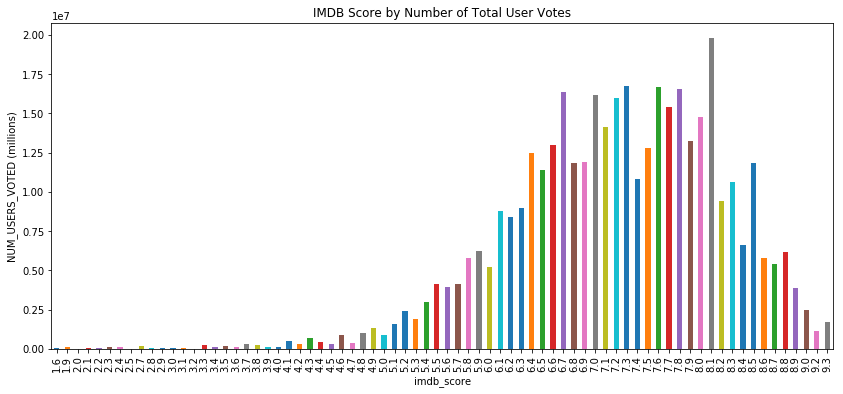

In [52]:
# Relationship between the total number of users that voted for a movie and its IMDB Score

import matplotlib.pyplot as plt
% matplotlib inline
plt.figure(figsize=[14,6])
plt.xlabel('IMDB_SCORE')
plt.ylabel('NUM_USERS_VOTED (millions)')
plt.title('IMDB Score by Number of Total User Votes')
df.groupby('imdb_score')['num_voted_users'].sum().plot(kind='bar')

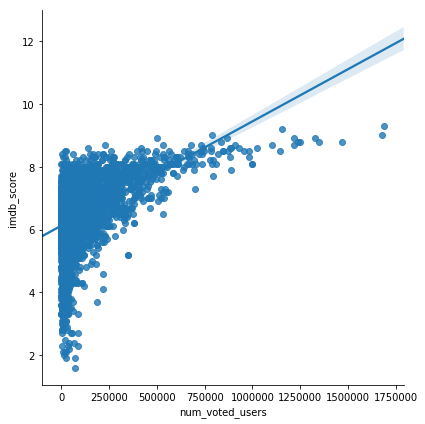

In [53]:
sns.lmplot('num_voted_users', 'imdb_score', df, size=6)

### Section 4.2: Relationship between the average number of users that voted for a movie by its IMDB Score Category


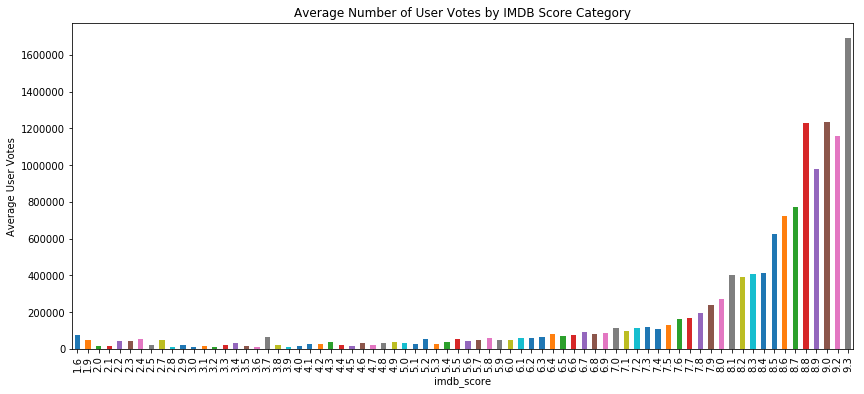

In [54]:
plt.figure(figsize=[14,6])
plt.ylabel('Average User Votes')
plt.title('Average Number of User Votes by IMDB Score Category')
df.groupby('imdb_score')['num_voted_users'].mean().plot(kind='bar')

### Section 4.3: Relationship between the average duration of a movie and its IMDB Score


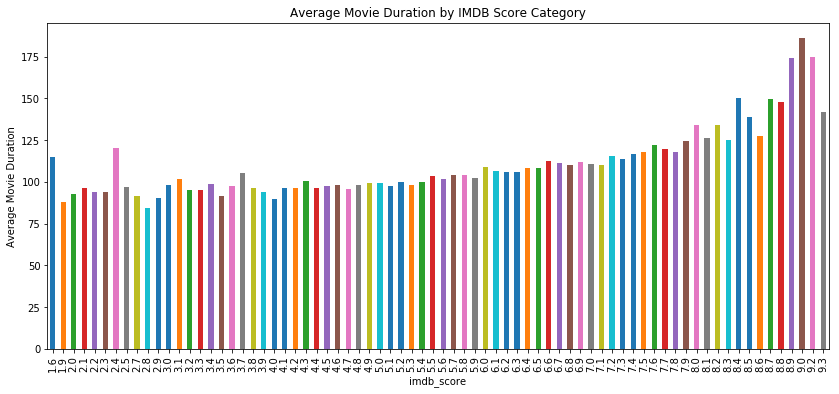

In [55]:
plt.figure(figsize=[14,6])
plt.title('Average Movie Duration by IMDB Score Category')
plt.ylabel('Average Movie Duration')
df.groupby('imdb_score')['duration'].mean().plot(kind='bar')

### Section 4.4: Average IMDB Movie Scores by Country


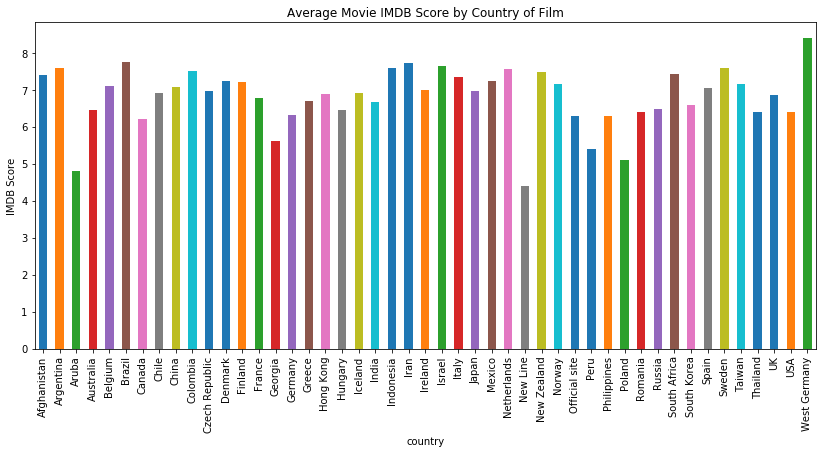

In [56]:
plt.figure(figsize=[14,6])
plt.title('Average Movie IMDB Score by Country of Film')
plt.xlabel('Country')
plt.ylabel('IMDB Score')
df.groupby('country')['imdb_score'].mean().plot(kind='bar')

### Section 4.5: Average IMDB Score by Movie Genre

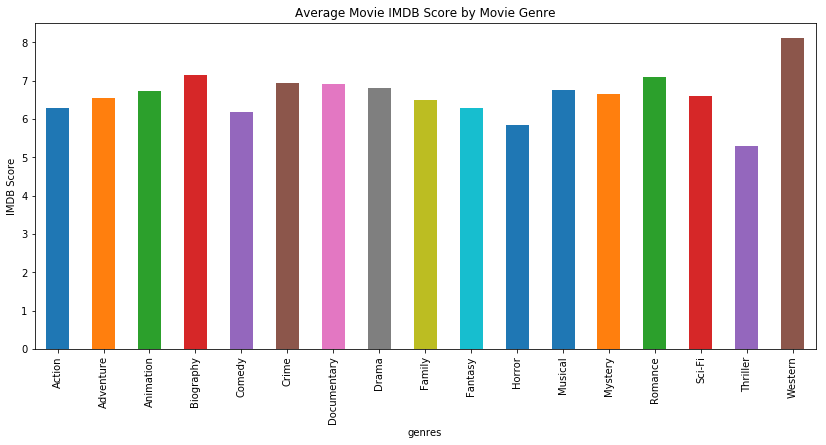

In [57]:
plt.figure(figsize=[14,6])
plt.title('Average Movie IMDB Score by Movie Genre')
plt.xlabel('Genre')
plt.ylabel('IMDB Score')
df.groupby('genres')['imdb_score'].mean().plot(kind='bar')

### Section 4.6: Relationship between the Average Number of Facebook Likes a Movie has and its IMDB Score

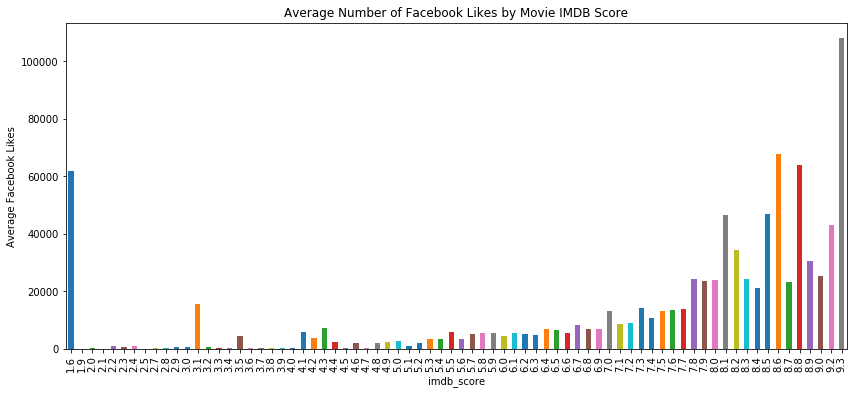

In [58]:
plt.figure(figsize=[14,6])
plt.title('Average Number of Facebook Likes by Movie IMDB Score')
plt.ylabel('Average Facebook Likes')
df.groupby('imdb_score')['movie_facebook_likes'].mean().plot(kind='bar')

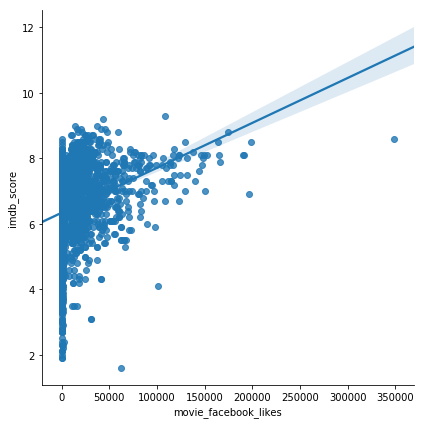

In [59]:
sns.lmplot('movie_facebook_likes', 'imdb_score', df, size=6)

### Section 4.7: Relationship between the Average Budget a movie had and its IMDB Score

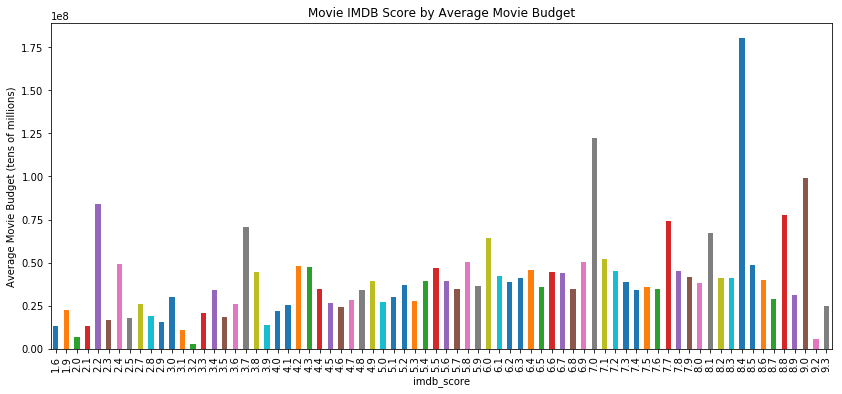

In [60]:
plt.figure(figsize=[14,6])
plt.title('Movie IMDB Score by Average Movie Budget')
plt.ylabel('Average Movie Budget (tens of millions)')
df.groupby('imdb_score')['budget'].mean().plot(kind='bar')

### Section 4.8: Relationship between the Average Gross Revenue a movie had and its IMDB Score

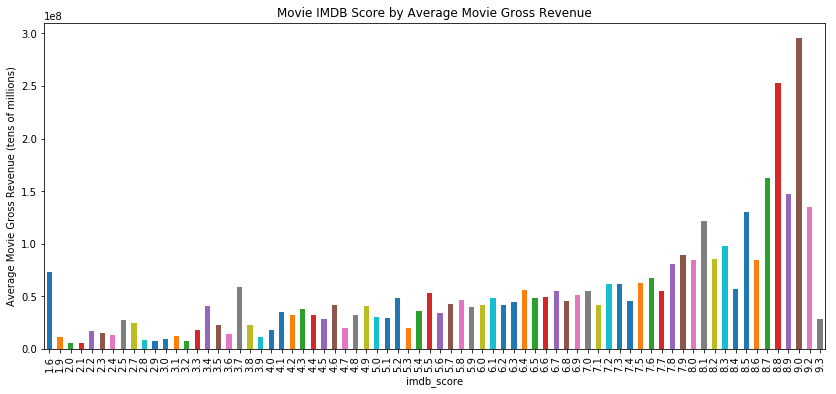

In [61]:
plt.figure(figsize=[14,6])
plt.title('Movie IMDB Score by Average Movie Gross Revenue')
plt.ylabel('Average Movie Gross Revenue (tens of millions)')
df.groupby('imdb_score')['gross'].mean().plot(kind='bar')

### Section 4.9: Relationship between the Average IMDB Score by Movie Content Rating Category

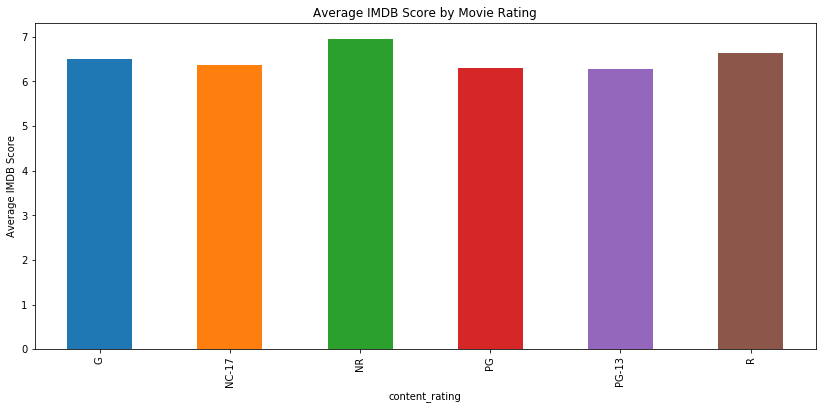

In [62]:
plt.figure(figsize=[14,6])
plt.title('Average IMDB Score by Movie Rating')
plt.ylabel('Average IMDB Score')
df.groupby('content_rating')['imdb_score'].mean().plot(kind='bar')

### Section 4.10: Relationship between the Movie's Language and its IMDB Score

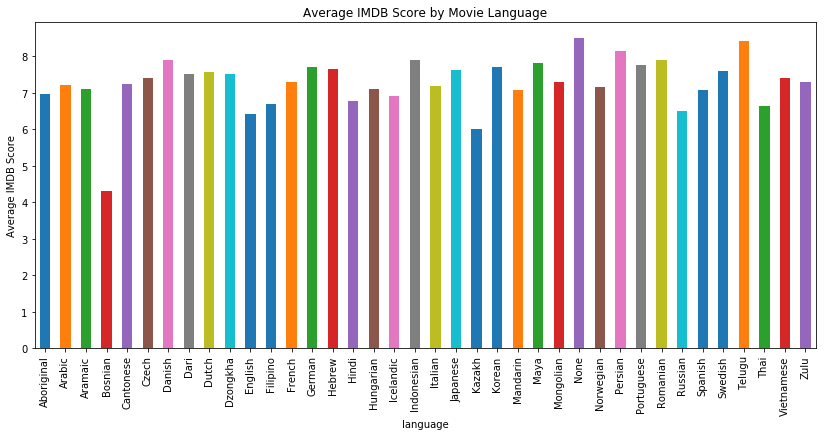

In [63]:
plt.figure(figsize=[14,6])
plt.title('Average IMDB Score by Movie Language')
plt.ylabel('Average IMDB Score')
df.groupby('language')['imdb_score'].mean().plot(kind='bar')

### Section 4.11: Relationship between the Average number of Critical Reviews a movie received and its IMDB Score

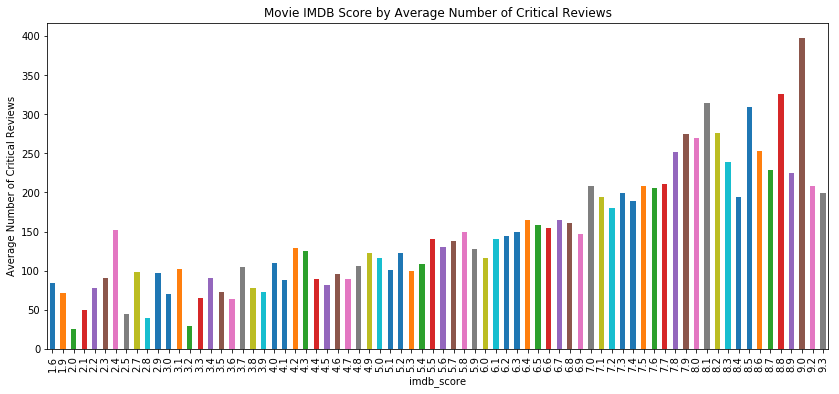

In [64]:
plt.figure(figsize=[14,6])
plt.title('Movie IMDB Score by Average Number of Critical Reviews')
plt.ylabel('Average Number of Critical Reviews')
df.groupby('imdb_score')['num_critic_for_reviews'].mean().plot(kind='bar')

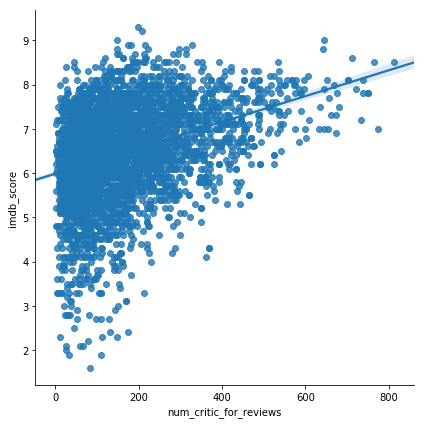

In [65]:
sns.lmplot('num_critic_for_reviews', 'imdb_score', df, size=6)

### Section 4.12: Relationship between the Average number of Critical Reviews a movie received and its IMDB Score

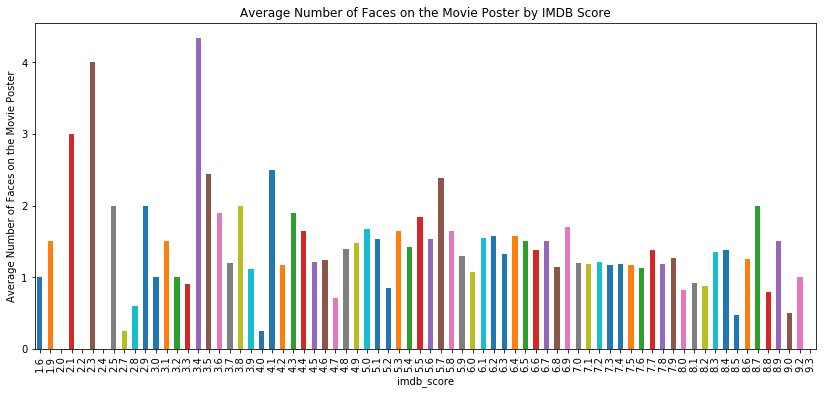

In [66]:
plt.figure(figsize=[14,6])
plt.title('Average Number of Faces on the Movie Poster by IMDB Score')
plt.ylabel('Average Number of Faces on the Movie Poster')
df.groupby('imdb_score')['facenumber_in_poster'].mean().plot(kind='bar')

### Section 4.13: Relationship between the Average number of Director Facebook Likes and its IMDB Score

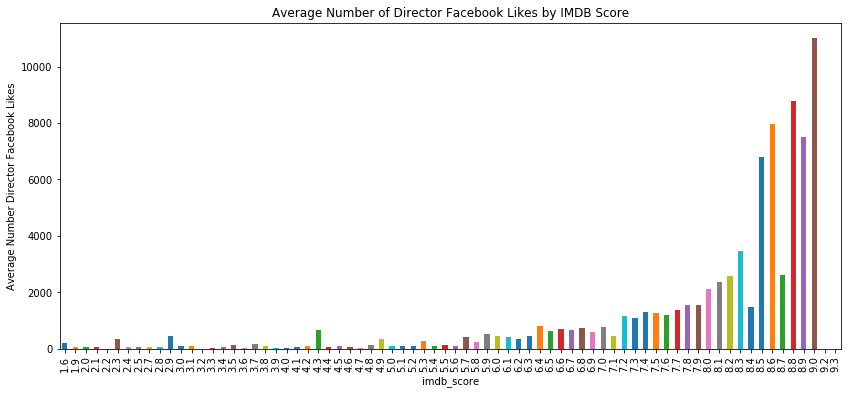

In [67]:
plt.figure(figsize=[14,6])
plt.title('Average Number of Director Facebook Likes by IMDB Score')
plt.ylabel('Average Number Director Facebook Likes')
df.groupby('imdb_score')['director_facebook_likes'].mean().plot(kind='bar')

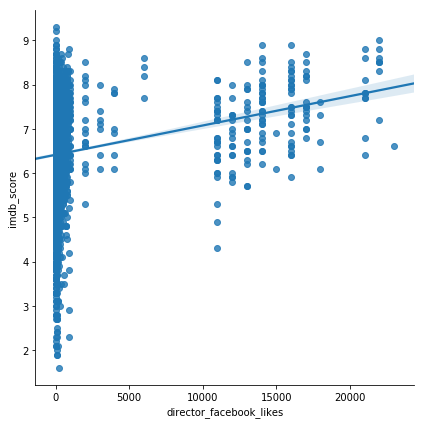

In [68]:
sns.lmplot('director_facebook_likes', 'imdb_score', df, size=6)

## Section 5: Correlation Analysis

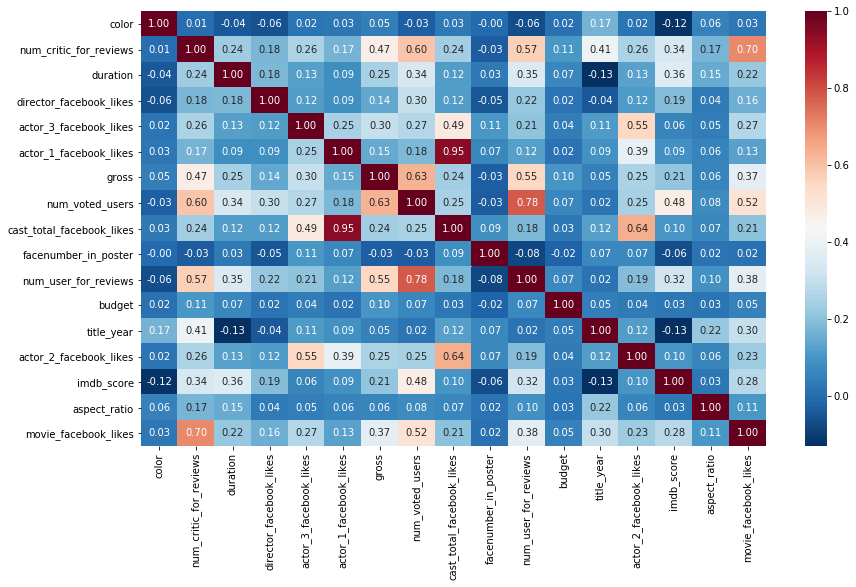

In [69]:
plt.figure(figsize=[14,8])
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu_r')

##### Based on this correlation matrix, it appears that the 3 variables that are most highly correlated with IMDB Score are as follows:
                1. Num_Voted_Users with an r value of 0.41
                2. Num_critic_for_reviews with an r value of 0.30
                3. Num_users_for_reviews with an r value of 0.29

##### The top 3 variables that are most highly correlated with the 3 variables above are as follows:
                1. The top 3 variables that are most highly correlated with Num_Voted_Users are:
                   1a: Num_users_for_reviews with an r value of 0.8, which means they are strongly
                       positively linearly related
                   1b: Gross with an r value of 0.64
                   1c: Num_critic_for_reviews with an r value of 0.62
                   
                2. The top 3 variables that are most highly correlated with Num_critic_for_reviews are:
                   2a: Movie facebook likes with an r value of 0.68
                   2b: Num_voted_users with an r value of 0.62
                   2c: Num_users_for_reviews with an r value of 0.61
                   
                3. The top 3 variables that are most highly correlated with Num_users_for_reviews are:
                   3a: Num_voted_users with an r value of 0.8
                   3b: Num_critic_for_review with an r value of 0.61
                   3c: Gross with an r value of 0.56

## Section 6: Storytelling and Conclusions

#### Based on the business intelligence and preliminary analysis performed on this dataset, we can conclude a few major things.


1: The total number of users that voted for a movie had an impact on the movie's score. 

     -In general, the higher the total number of users that voted for a movie, the higher 
      its score, up to a point. After a movie had a score of about 8.5, the total number of users 
      that voted started to taper off. The average number of users that voted per IMDB score 
      category was also important. In general, the higher a movie's score, the higher the number 
      of people that voted on average.

2: Facebook Likes were important.
    
    -Movies that had a higher score also had a greater number of likes on Facebook on average than movies 
     that had a lower score. There is a moderately strong positive correlation between the number of 
     facebook likes and the IMDB score that a movie receives, leading us to believe that more facebook 
     likes are more likely to lead to a higher score.
    
3: The amount of gross revenue matters.

    -Movies that had a higher IMDB score tended to have higher gross revenues on average than those movies 
     with a lower score. This makes sense, because if movies made more gross revenue, that means that more 
     people went to see the movie in theaters or bought the movie on DVD, which means that it is more 
     likely to be a good movie.
     
     
4: Critics' opinions matter.

    -There appeared to be a pretty strong relationship between IMDB score and the number of critical reviews 
     a movie received. As a movie got more and more reviews from critics, the score tended to be higher 
     on average than those movies that did not have as many critical reviews, leading one to draw the 
     conclusion that the more press and media attention that a film recieves, the more likely it is 
     to have a higher IMDB score.
     
5: The Director's popularity plays a factor.
     
     -Director popularity on Facebook tended to help movies get higher scores. Those movies that had 
      high scores also had directors that on average had a higher number of facebook likes than 
      directors of movies that had lower scores. This makes sense because directors that are popular
      tend to make good movies on a pretty consistent basis, which is why they are popular.
      
6: Some predictor variables had little to no impact on a movie's IMDB score.

    -The following factors had little to no impact on a movie's final score.
            
            1. Movie Duration
            2. Country that the movie was produced
            3. Genre
            4. Average Budget was relatively similar across all scores
            5. Content rating did not impact a movie's score at all
            6. Language was not a predictor of score
            7. The number of faces on the movie poster also had no impact on the movie's IMDB score
     


#### On my honor as a student, I have neither given nor received any unauthorized aid on this academic work.

Eric VanMeerhaeghe